<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/AI-ML/blob/main/SEM1/ML/lab_9_logisticregression_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression for Multiclass classification

<b>Logistic Regression model</b>  is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.

A <b>binary logistic model</b> has a dependent variable with two possible values, such as pass/fail which is represented by labels 1/0.

<div align="right">   Reference: Wikipedia </div>

The same <b>Logistic Classifier</b> can be applied for multinomial classification also.

## 1. Import necessary libraries

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## 2. Import and preprocess the dataset

Iris dataset consists of 150 observations.

The features or attributed (columns) are Sepal Length, Sepal Width, Petal Length and Petal Width.

The observations (rows) belong to 3 different types of iris species - Setosa, Versicolour, and Virginica. Each class has 50 observations.

The iris dataset can be downloded from Kaggle: https://www.kaggle.com/uciml/iris as csv file.


In [4]:
# Load Iris dataset.

iris = load_iris()

# Extract two columns from the dataset for X values.
# X is  petal length, petal width.
# y is the target column.

X = iris["data"][:,(2,3)]
y = iris["target"]

In [5]:
# Split data into train and test

(X_train, X_test, y_train, y_test) = train_test_split(X, y, stratify=y, test_size= 0.3)


## 3. Create and train the machine learning model

In [6]:
# build the model

logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=5)
# default values are used

logreg.fit(X_train,y_train) # train

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=5, multi_class='multinomial')

## 4. Make Predictions

In [8]:
# predict the values

y_prob  = logreg.predict(X_test)


## 5. Performance measures

In [9]:
acc = accuracy_score(y_test, y_prob)
print(acc * 100)

91.11111111111111


In [10]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_prob)
print('Confusion Matrix :')
print(conf_matrix)


Confusion Matrix :
[[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]


In [11]:
from sklearn.metrics import classification_report

print('Classification Report:')
print(classification_report(y_test, y_prob))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



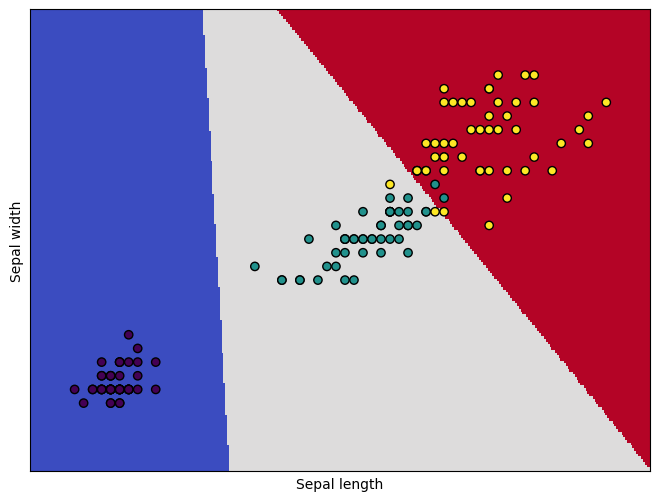

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = 0.02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.coolwarm)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.viridis)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()